# 27/9/18 #

Hoy vinimos al labo a tratar de medir con instrumentos. La idea era llegar a las 15hs, pero recien a las 17hs pudimos entrar. Esperemos llegar a medir.

Lo primero fue instalar todo (el git y el env) en la una compu cualquiera. ahora estamos instalando el sounddevice. Anda.
    

In [1]:
import AudioControl
import numpy as np
import matplotlib.pyplot as plt
# import TektronixTDS1002B
# %matplotlib widget
# %matplotlib qt
%load_ext autoreload

In [2]:
# Vamos a probar los canales con nuestros cables mandando al osciloscopio.
AudioControl.testOutput()
# Se ve la salida en el osciloscopio.
# Tuvimos problema xq conectamos los plug despues de inicial el kernel, pero reseteando el kernoel funciono bien

Tendría que haber escuchado 1 segundo de audio en cada canal


In [8]:
# El volumen de la compu esta al maximo. Vamos a testear el rango de voltajes. 
data = AudioControl.playrec(AudioControl.Onda(440,long=60,amp=0.5))
# Data guardada en all0000
# Vpp entre 1.3 y 1.4 

In [10]:
# El volumen de la compu esta al 50%. Vamos a testear el rango de voltajes. 
data = AudioControl.playrec(AudioControl.Onda(440,long=60,amp=0.5))
# Data guardada en raiz all0000
# Vpp entre 480 y 600 mV 

In [12]:
# El volumen de la compu esta al 100%. Vamos a testear el rango de voltajes. 
data = AudioControl.playrec(AudioControl.Onda(440,long=30,amp=1))
# Data guardada en 0001
# 2.56 -2.6 Vpp

In [13]:
# El volumen de la compu esta al 100%. Vamos a testear el rango de voltajes. 
data = AudioControl.playrec(AudioControl.Onda(440,long=10,amp=2))
# Data guardada en 0002
# 2.56 -2.6 Vpp pero satura

### Conclusiones parciales ###

La salida va al menos en esta placa como mucho 2.6 Vpp, el array de datos puede ir como mucho de 1 a -1 y despues satura. Convendria modificar en el codigo en el defalut qe amp_max sea 1

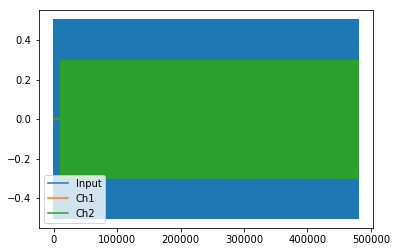

In [5]:
# Ahora vamos a chequear que la entracda que estamos usando (que en esta compu es line-in y no Mic) funcione
# Vamos a medir en paralelo con el osciloscopio para testera la señal. 
data = AudioControl.playrec(AudioControl.Onda(440,long=10,amp=0.5), show =True)
# Data 0003
# np.savetxt('./Mediciones/dataEquivalente0003.csv',data,delimiter=',')

In [4]:
# Vamos a enviar una cuadrada para ver el slewrate del generador
data = AudioControl.playrec(AudioControl.square(440,long=10))
np.savetxt('./Mediciones/dataEquivalente0004.csv',data,delimiter=',')
# grabo como 0004

In [ ]:
# Vamos a hacer ahora un barrido en frecuencias.
# Lo hacemos de 1 a 40000 hz porque mas alla de eso empieza a haber claros problemas de aliasing. 
# tiro un extraño error. Probamos actualizar todos los paquetes y volver a probar.
RtaFrecProtoboard = AudioControl.RtaFrecuencia(frec_min=1, frec_max=40000, stereo=True)

  0%|                                                 | 0/1000 [00:00<?, ?it/s]

In [ ]:
data = AudioControl.playrec_sync(AudioControl.square(0.2,long=10), plot=True)

In [ ]:
# Al llegar aca tuvimos problemas, hay dos problemas que no se si estan conectados o no. Uno es que el line-in parece no tener los dos canales conectados y otro que el sd.wait(9 empezo a flashearla.
# Pero nos quedamos sin tiempo. Hasta aca llegadmos